# Visualization InfluxDB

## Imports

In [8]:
import influxdb_client
import pytz
import pandas as pd

## Consts

In [15]:
url = 'http://localhost:8086'
token = '5dALrxtzd_AeO098d22ICSYIxsmrkLhnfRBi3Lh9uGqDSRjzb4a56w3M0V_VIAgBhk_k6EgPV8HG3ddVgNKWDA=='
org = 'BFH'
flashback = 5

## Client initialisation

In [16]:
query_api = influxdb_client.InfluxDBClient(
   url=url,
   token=token,
   org=org
).query_api()

## Setup Query

In [17]:
query = f'from(bucket:"challenge")\
|> range(start: -{flashback}m)\
|> filter(fn:(r) => r._measurement == "gyroscope")\
|> filter(fn:(r) => r._field == "z")'

## Query InfluxDB

In [18]:
result = query_api.query(org=org, query=query)

## Prepare data

In [19]:
results = []
for table in result:
  for record in table.records:
    results.append((record.get_time().astimezone(pytz.timezone('Europe/Zurich')), record.get_value()))

print(results)

[(datetime.datetime(2024, 12, 15, 14, 48, 26, 868000, tzinfo=<DstTzInfo 'Europe/Zurich' CET+1:00:00 STD>), 0.03286460787), (datetime.datetime(2024, 12, 15, 14, 48, 26, 878000, tzinfo=<DstTzInfo 'Europe/Zurich' CET+1:00:00 STD>), 0.03597491235), (datetime.datetime(2024, 12, 15, 14, 48, 26, 888000, tzinfo=<DstTzInfo 'Europe/Zurich' CET+1:00:00 STD>), 0.03513388336), (datetime.datetime(2024, 12, 15, 14, 48, 26, 898000, tzinfo=<DstTzInfo 'Europe/Zurich' CET+1:00:00 STD>), 0.0266823452), (datetime.datetime(2024, 12, 15, 14, 48, 26, 908000, tzinfo=<DstTzInfo 'Europe/Zurich' CET+1:00:00 STD>), 0.0223063454), (datetime.datetime(2024, 12, 15, 14, 48, 26, 918000, tzinfo=<DstTzInfo 'Europe/Zurich' CET+1:00:00 STD>), 0.02535539865), (datetime.datetime(2024, 12, 15, 14, 48, 26, 928000, tzinfo=<DstTzInfo 'Europe/Zurich' CET+1:00:00 STD>), 0.0305664707), (datetime.datetime(2024, 12, 15, 14, 48, 26, 938000, tzinfo=<DstTzInfo 'Europe/Zurich' CET+1:00:00 STD>), 0.03335985914), (datetime.datetime(2024, 1

## Visualise data

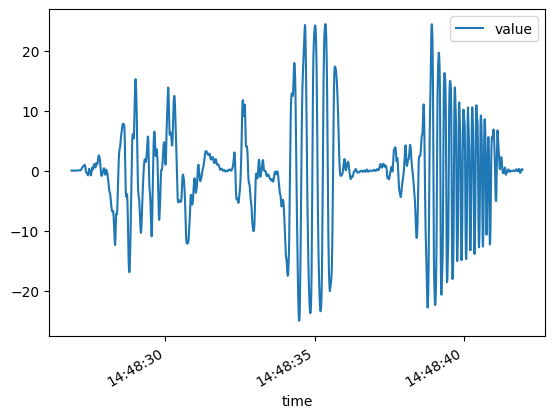

In [20]:
if len(results) > 0:
    res_df = pd.DataFrame(results, columns=['time', 'value', ])
    res_df.plot.line(x='time')
else:
    print(f"No data found in the last {flashback} minutes.")